## SVM Monk 2

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

from sklearn import metrics 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [12]:
path=r'/home/ludovico/ML-project/data/monks-2'
monk1_train = pd.read_csv(path+'.train', header=None, delim_whitespace=True, dtype=str)
monk1_test = pd.read_csv(path+'.test', header=None, delim_whitespace=True, dtype=str)

y_train=monk1_train[0]
x_train=monk1_train[monk1_train.columns[1:-1]]

y_test=monk1_test[0]
x_test=monk1_test[monk1_train.columns[1:-1]]

x_test_not_enc=x_test
x_train_not_enc=x_train

encoder = OneHotEncoder(sparse_output=False)
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

best_model_kernel=[]
enc=[]

## SVM polynomial 

In [ ]:
estimator_SVC= SVC()

C=np.logspace(-3,3,4)
gamma=np.logspace(-3,3,6)
coef=np.linspace(-10,10,5)
deg=np.arange(2,5,1)

parameters_SVM_poly= {
    'C':C,
    'kernel': ['poly'],
    'gamma':gamma,
    'coef0': coef ,
    'degree': deg ,
    'max_iter': [100000]  
}          


grid_search = GridSearchCV(
    estimator=estimator_SVC,
    param_grid=parameters_SVM_poly,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
    
)

grid_search_2 = GridSearchCV(
    estimator=estimator_SVC,
    param_grid=parameters_SVM_poly,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
   
)

SVM_1=grid_search.fit(x_train, y_train)
SVM_2=grid_search_2.fit(x_train_not_enc, y_train)

In [14]:
print('encoded',SVM_1.best_params_)
print('not encoded',SVM_2.best_params_) 

best1=SVM_1.best_score_
best2=SVM_2.best_score_

print('Best Score Encoded - Validation:', best1 )
print('Best Score not Encoded- Validation:', best2 )

if best1>best2:
    SVM_poly=SVM_1
    enc_poly='Yes'
    print('\n best model: encoded \n')
else:
    SVM_poly=SVM_2
    enc_poly='No'
    print('\n best model: not encoded \n')

cv_results_df = pd.DataFrame(SVM_poly.cv_results_)
best_model_index=SVM_poly.best_index_

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]

print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

best_model_kernel.append(SVM_poly)
enc.append(enc_poly)


encoded {'C': 10.0, 'coef0': -5.0, 'degree': 2, 'gamma': 3.981071705534969, 'kernel': 'poly', 'max_iter': 100000}
not encoded {'C': 10.0, 'coef0': -5.0, 'degree': 2, 'gamma': 3.981071705534969, 'kernel': 'poly', 'max_iter': 100000}
Best Score Encoded - Validation: 0.9315329768270945
Best Score not Encoded- Validation: 0.9315329768270945

 best model: not encoded 

Train accuracy: 1.0 +/- 0.0
validation accuracy: 0.9315329768270945 +/- 0.08412464997315867


## SVM RBF

In [5]:
estimator_svm = SVC()
C=np.logspace(-3,5,10)

gamma=(0.001,0.01,0.1,10,100,1000)


#rbf kernel parameters
parameters_SVM_rbf= {
    'C':C,
    'kernel': ['rbf'],
    'gamma':gamma,
    #'max_iter':[1000000]
}    

# with GridSearch
grid_search = GridSearchCV(
    estimator=estimator_SVC,
    param_grid=parameters_SVM_rbf,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
    
)

grid_search_2 = GridSearchCV(
    estimator=estimator_SVC,
    param_grid=parameters_SVM_rbf,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
)

SVM_1=grid_search.fit(x_train, y_train)
SVM_2=grid_search_2.fit(x_train_not_enc, y_train)

In [6]:
print('encoded',SVM_1.best_params_)
print('not encoded',SVM_2.best_params_) 

best1=SVM_1.best_score_
best2=SVM_2.best_score_

print('Best Score Encoded - Validation:', best1 )
print('Best Score not Encoded- Validation:', best2 )

if best1>best2:
    SVM_rbf=SVM_1
    enc_rbf='Yes'
    print('\n best model: encoded \n')
else:
    SVM_rbf=SVM_2
    enc_rbf='No'
    print('\n best model: not encoded \n')

cv_results_df = pd.DataFrame(SVM_rbf.cv_results_)
best_model_index=SVM_rbf.best_index_

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]

print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

best_model_kernel.append(SVM_rbf)
enc.append(enc_rbf)

encoded {'C': 12915.496650148827, 'gamma': 0.01, 'kernel': 'rbf'}
not encoded {'C': 1668.1005372000557, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score Encoded - Validation: 0.8643493761140821
Best Score not Encoded- Validation: 0.7639928698752227

 best model: encoded 

Train accuracy: 1.0 +/- 0.0
validation accuracy: 0.8643493761140821 +/- 0.1226070515652121


## SVM Sigmoid

In [7]:
estimator_svm = SVC()

C=np.logspace(-4,4,20)
gamma=(0.001,0.01,0.1,10,100,1000)
coef=np.linspace(-10,10,20)


#sigmoid kernel parameters
parameters_SVM_sigmoid= {
    'C':C,
    'kernel': ['sigmoid'],
    'gamma':gamma,
    'coef0':coef   
}      

# with GridSearch
grid_search = GridSearchCV(
    estimator=estimator_SVC,
    param_grid=parameters_SVM_sigmoid,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
    
)

grid_search_2 = GridSearchCV(
    estimator=estimator_SVC,
    param_grid=parameters_SVM_sigmoid,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
)

SVM_1=grid_search.fit(x_train, y_train)
SVM_2=grid_search_2.fit(x_train_not_enc, y_train)

In [8]:
print('encoded',SVM_1.best_params_)
print('not encoded',SVM_2.best_params_) 

best1=SVM_1.best_score_
best2=SVM_2.best_score_

print('Best Score Encoded - Validation:', best1 )
print('Best Score not Encoded- Validation:', best2 )

if best1>best2:
    SVM_sigmoid=SVM_1
    enc_sigmoid='Yes'
    print('\n best model: encoded \n')
else:
    SVM_sigmoid=SVM_2
    enc_sigmoid='No'
    print('\n best model: not encoded \n')

cv_results_df = pd.DataFrame(SVM_sigmoid.cv_results_)
best_model_index=SVM_sigmoid.best_index_

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]

print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

best_model_kernel.append(SVM_sigmoid)
enc.append(enc_sigmoid)

encoded {'C': 545.5594781168514, 'coef0': -1.578947368421053, 'gamma': 0.1, 'kernel': 'sigmoid'}
not encoded {'C': 10000.0, 'coef0': -6.842105263157895, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best Score Encoded - Validation: 0.7163992869875223
Best Score not Encoded- Validation: 0.6746880570409983

 best model: encoded 

Train accuracy: 1.0 +/- 0.0
validation accuracy: 0.7163992869875223 +/- 0.11476843394303232


## Final model selection

In [9]:
val_acc=[]
for model in best_model_kernel:
    val_acc.append(model.best_score_)

SVM=best_model_kernel[np.argmax(np.array(val_acc))]
e=enc[np.argmax(np.array(val_acc))]
print('best_params',SVM.best_params_)
print('encoded:',e)

{'C': 10.0, 'coef0': -5.0, 'degree': 2, 'gamma': 3.981071705534969, 'kernel': 'poly', 'max_iter': 100000}


## Model assessment

Accuracy Score - KNN - Test-error: 1.0

 Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



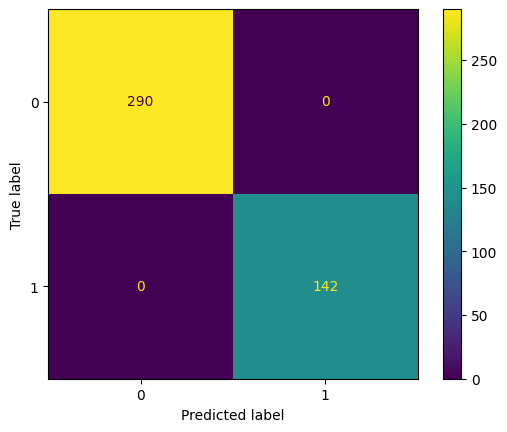

In [10]:
SVM=SVM_poly
y_pred =SVM.predict(x_test)

print('Accuracy Score - KNN - Test-error:', metrics.accuracy_score(y_test, y_pred))  

print('\n Classification report',metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=SVM.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=SVM.classes_)
disp.plot()
plt.show()